#**Recommendation System**
Recommender systems are one of the most popular data science applications today.

A recommender system is a data science application that is used to predict or offer products to customers based on their past purchase or browsing history.

Many of the big technology companies use a recommender system in some form to recommend products to customers.

They are used by Amazon for product recommendations, YouTube for video recommendations, Netflix and IMDB for movie recommendations and Facebook for friend recommendations.

##Data collection
The first step in building a recommendation engine is data collection.

There are two forms of data collection techniques employed in recommender systems.

These are **explicit** and **implicit** forms of data collection.

Explicit data is information that is provided intentionally, i.e. input from the users such as movie ratings.

Implicit data is information that is not provided intentionally but gathered from available data streams like search history, clicks, order history, etc.

##Examples of explicit data collection include the following
Asking a user to rate an item on a sliding scale.

Asking a user to search.

Asking a user to rank a collection of items from favorite to least favorite.

Presenting two items to a user and asking him/her to choose the better one of them.

Asking a user to create a list of items that he/she likes.

##Examples of implicit data collection include the following¶

Observing the items that a user views in an online store.

Analyzing item/user viewing times.

Keeping a record of the items that a user purchases online.

Obtaining a list of items that a user has listened to or watched on his/her computer.

Analyzing the user's social network and discovering similar likes and dislikes.

##Filtering the data
The third and final step in building a recommendation engine is filter the data to extract relevant information required to make final recommendations.

There are two major approaches to filter the data to extract relevant information. These are as follows:-

Collaborative Filtering – based on similar users.

Content-Based Filtering – based on product attributes.

The difference between the above two approaches are shown in the following diagram-

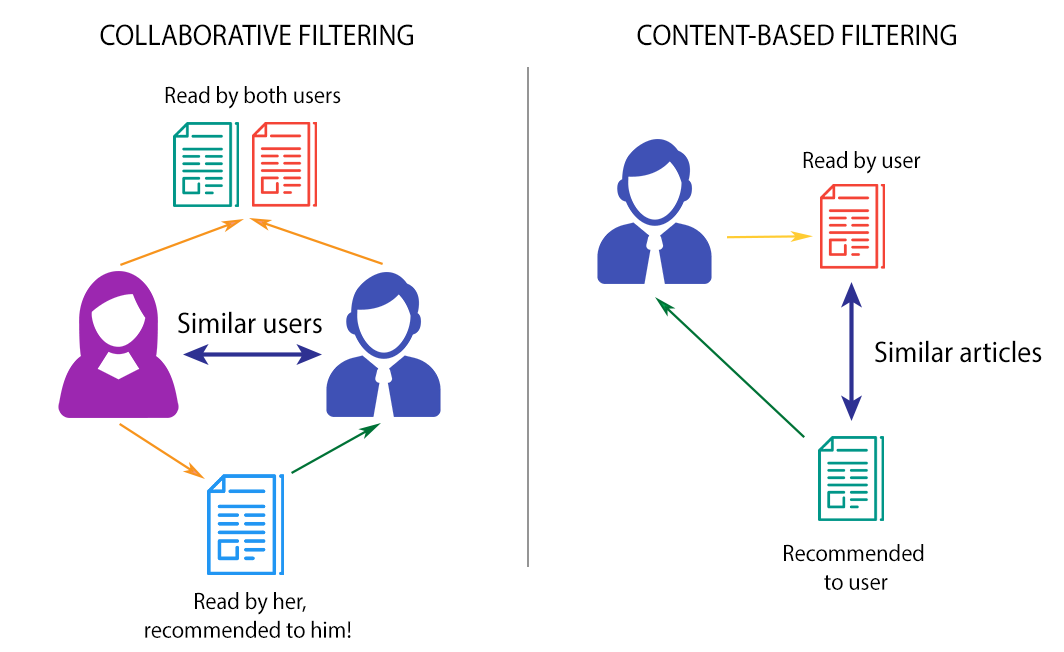

##Implement a simple Movie Recommender System in Python
In this section, we will develop a very simple movie recommender system in Python that uses the correlation between the ratings assigned to different movies. Thus, we will find the similarity between the movies.

The dataset that we are going to use for this problem is the MovieLens Dataset.

In [20]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
#load ratings data
ratings_data=pd.read_csv('/content/sample_data/ratings.csv')
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


We can see from the output that the ratings.csv file contains the - userId, movieId, ratings and timestamp attributes.

Each row in the dataset corresponds to one rating. The userId column contains the ID of the user who left the rating. The movieId column contains the Id of the movie, the rating column contains the rating left by the user. Ratings can have values between 1 and 5.

Finally, the timestamp refers to the time at which the user left the rating.

There is one problem with this dataset. It contains the IDs of the movies but not their titles. We will need movie names of the movies to recommend. The movie names are stored in the movies.csv file. So, let's explore that file.

In [3]:
movies_data=pd.read_csv('/content/sample_data/movies.csv')
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


We can see that, this dataset contains movieId, the title of the movie, and its genre.

We need a dataset that contains the userId, movie title and its ratings.

We have this information in two different files: ratings.csv and movies.csv.

To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

We can do this using the merge() function from the Pandas library, as shown below.

In [4]:
df=pd.merge(ratings_data,movies_data, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


We can see our newly created dataframe contains userId, title and rating of the movie as required.

Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie. We will then display the first five movies along with their average rating using the head() method as follows:

In [5]:
df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

We can see that the average ratings are not sorted. Let's sort the ratings in the descending order of their average ratings:

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

The movies have now been sorted according to the ascending order of their ratings.

However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

Let's now plot the total number of ratings for a movie:

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

Now, we can see some great movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes.

So, let's create a new dataframe that contains both of these attributes.

We will create a new dataframe called ratings_mean_count and first add the average rating of each movie to this dataframe as follows-

In [11]:
ratings_mean_count = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings_mean_count.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


Next up, we will add the number of ratings for a movie to the ratings_mean_count dataframe as follows-

In [12]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


We can see movie title, along with the average rating and number of ratings for the movies. Now, let's plot a histogram for the number of ratings represented by the rating_counts column in the above dataframe.

<Axes: >

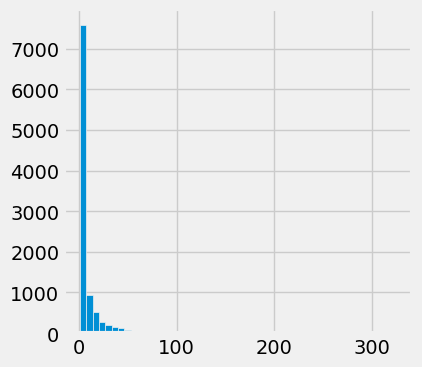

In [23]:
plt.figure(figsize=(4,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

From the above plot, we can see that most of the movies have received less than 50 ratings and there are no movies having more than 100 ratings. Now, we will plot a histogram for average ratings.

<Axes: >

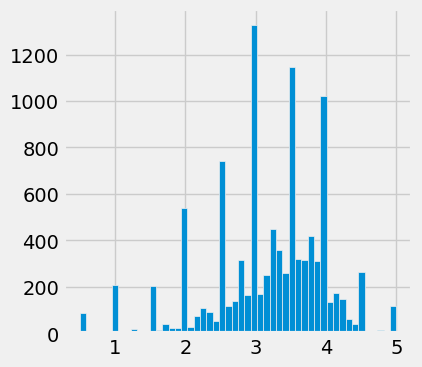

In [24]:
plt.figure(figsize=(4,4))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 400x200 with 0 Axes>

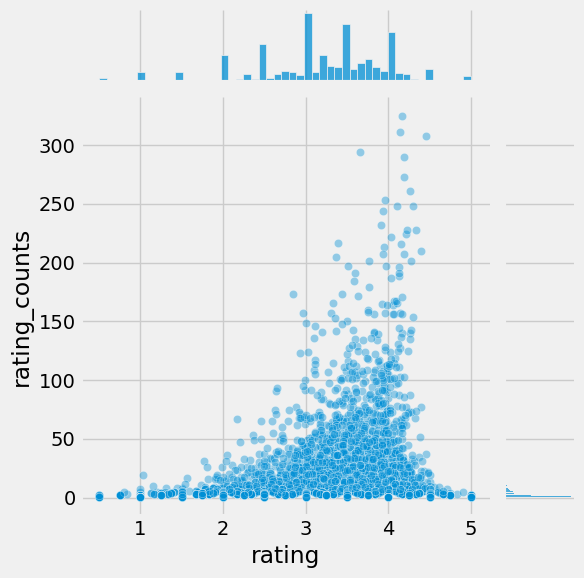

In [27]:
#plot average ratings against the number of ratings.
plt.figure(figsize=(4,2))
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

##Finding Similarities Between Movies
Now, it is the time to find the similarity between the movies.

We will use the correlation between the ratings of a movie as the similarity metric.

To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

This matrix will have a lot of null values since every movie is not rated by every user.

We will create the matrix of movie titles and corresponding user ratings.

In [28]:
user_movie_rating = df.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We know that each column contains all the user ratings for a particular movie.

Now, let's find all the user ratings for the movie Pulp Fiction (1994)  and find the movies similar to it.

We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

We will find the user ratings for Pulp Fiction (1994)  as follows-

In [29]:
pulp_fiction_ratings = user_movie_rating['Pulp Fiction (1994)']

pulp_fiction_ratings.head()

userId
1    4.0
2    NaN
3    5.0
4    4.0
5    NaN
Name: Pulp Fiction (1994), dtype: float64

We can see from the above output, that it will return a Pandas series. Now, we will retrieve all the movies that are similar to Pulp Fiction (1994).

We can find the correlation between the user ratings for the Pulp Fiction (1994) and all the other movies using corrwith() function as shown below:

In [30]:
correlated_movies = user_movie_rating.corrwith(pulp_fiction_ratings)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [31]:
corr_pulp_fiction = pd.DataFrame(correlated_movies, columns=['Correlation'])
corr_pulp_fiction.dropna(inplace=True)
corr_pulp_fiction.head()

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",-0.475997
(500) Days of Summer (2009),0.076894
*batteries not included (1987),0.881917
...And Justice for All (1979),0.961524


Now, let's sort the movies in descending order of correlation to see highly correlated movies at the top

In [32]:
corr_pulp_fiction.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Delta Farce (2007),1.0
Waxwork (1988),1.0
"Endless Summer 2, The (1994)",1.0
Torch Song Trilogy (1988),1.0
"Art of the Steal, The (2009)",1.0


From the above output, we can see that the movies that have high correlation with Pulp Fiction (1994) are not very well known.

This shows that correlation alone is not a good metric for similarity because there can be a user who watched Pulp Fiction (1994) and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings.

To do so, we will add the rating_counts column from the rating_mean_count dataframe to our corr_pulp_fiction dataframe.

In [33]:
corr_pulp_fiction = corr_pulp_fiction.join(ratings_mean_count['rating_counts'])
corr_pulp_fiction.head()

,Correlation,rating_counts
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",-0.475997,20
(500) Days of Summer (2009),0.076894,37
*batteries not included (1987),0.881917,11
...And Justice for All (1979),0.961524,10


We can see that the movie "...And Justice for All (1979)", which has the highest correlation has only 10 ratings. This means that only 10 users gave same ratings to 'Pulp Fiction (1994)'.

However, we can deduce that a movie cannot be declared similar to the another movie based on just 10 ratings. This is why we added rating_counts column.

Now, let's now filter movies correlated to 'Pulp Fiction (1994)', that have more than 50 ratings.

The following code snippet will do that-

In [34]:
corr_pulp_fiction[corr_pulp_fiction ['rating_counts']>50].sort_values('Correlation', ascending=False).head()

,Correlation,rating_counts
title,,
Pulp Fiction (1994),1.000000,325
"Royal Tenenbaums, The (2001)",0.571000,55
Being John Malkovich (1999),0.542833,124
Kill Bill: Vol. 2 (2004),0.530735,91
"Deer Hunter, The (1978)",0.520750,56


Now, we can see from the above output the movies that are highly correlated with Pulp Fiction (1994).

The movies in the list are some of the most famous Hollywood movies, and since Pulp Fiction (1994) is also a very famous movie, there is a high chance that these movies are highly correlated.


**Conclusion:**
we can recommend the below movies to the users who watched
Pulp Fiction (1994)

Royal Tenenbaums, The (2001)

Being John Malkovich (1999)

Kill Bill: Vol. 2 (2004)

Deer Hunter, The (1978)

Thus, we created a simple recommender system.